# Data 608 Final Project 
## by Violeta Stoyanova
### Introduction:

“If New York appears a little greener this summer, it is no mirage,” states C. J. Hughes in an New York Times article. Many parks and playgrounds are developed near living complexes and open to the public. For example, The Far West Side of Manhattan just opened new parklands and an interactive structure called “The Vessel” hoping to bring more people to this remote area. This project aims to discover the relationship between parks/ garden areas and rental pricing in New York City. It’s an interesting, culturally relevant topic that I can have some fun with and learn a lot from, all while demonstrating what I’ve learned. 



## Datasets for City of New York (Open Data)
Three datasets were used in this project:

### NYC Greenthumb Community Gardens
https://data.cityofnewyork.us/Environment/NYC-Greenthumb-Community-Gardens/ajxm-kzmj 

### Open Spaces/ Parks 
Planimetric basemap polygon layer containing open space features, such as courts, tracks, etc. including Parks. https://data.cityofnewyork.us/Recreation/Open-Space-Parks-/g84h-jbjm

### DOF: Condominium comparable rental income – Manhattan 
https://data.cityofnewyork.us/Housing-Development/DOF-Condominium-comparable-rental-income-Manhattan/ikqj-pyhc

## Importing the needed libraries/ packages 


In [201]:
import pandas as pd
import numpy as np
import json

## mapping 
import seaborn as sns
from shapely.geometry import Point, Polygon
import folium
import branca ## for color map
import geopandas as gpd
import geojsonio

# Matplotlib and plotly modules
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

from functools import partial
import pyproj
import shapely.ops

In [202]:
#loading the data
parks= pd.read_csv('C:\\Users\\Violet\\Desktop\\Data608\\PARK.csv')
parks.head(10)


,PARK_NAME,the_geom,FEAT_CODE,SOURCE_ID,SUB_CODE,LANDUSE,PARKNUM,STATUS,SYSTEM,SHAPE_Leng,SHAPE_Area
0,Commodore Barry Park,MULTIPOLYGON (((-73.97922375065221 40.69799879...,4910,21491000001,491050,Community Park,B021,Updated,NaN,829.420107,4.153980e+04
1,Pierrepont Playground,MULTIPOLYGON (((-73.99732028095745 40.69600764...,4980,21498000002,498000,Neighborhood Park,B222,Unchanged,NaN,607.555193,2.196049e+04
2,Cobble Hill Park,MULTIPOLYGON (((-73.9955741991998 40.687929182...,4980,21498000003,498000,Neighborhood Park,B326,Unchanged,NaN,784.421990,2.807908e+04
3,Commodore Barry Park,MULTIPOLYGON (((-73.97746661925957 40.69650941...,4980,21498000004,498000,Community Park,B021,Unchanged,NaN,2672.710150,4.384161e+05
4,Brooklyn Heights Promenade,MULTIPOLYGON (((-73.99746719287955 40.69692380...,4980,21498000005,498000,Triangle/Plaza,B223DG,Unchanged,NaN,1376.106398,1.446570e+04
5,Trinity Park,MULTIPOLYGON (((-73.98416407196115 40.69903067...,4980,21498000015,498000,Parkway,B223K,Unchanged,NaN,1218.559821,5.451044e+04
6,Trinity Park,MULTIPOLYGON (((-73.98361802247713 40.69873414...,4980,21498000016,498000,Parkway,B223K,Unchanged,NaN,792.633641,9.379272e+03
7,Bridge Park,MULTIPOLYGON (((-73.9844478739029 40.699929802...,4980,21498000066,498000,Recreation Field/Courts,B223JC,Unchanged,NaN,746.960771,2.501331e+04
8,Pelham Bay Golf Course,MULTIPOLYGON (((-73.7983614636537 40.884024185...,4940,15494000596,494000,NaN,X039,Unchanged,X039-GLF0012,13620.004188,9.836660e+06
9,Brooklyn Heights Promenade,MULTIPOLYGON (((-73.99830711319798 40.69531715...,4980,21498000006,498000,Triangle/Plaza,B223DK,Unchanged,NaN,3484.486788,4.635878e+04


In [203]:
parks.shape

(12491, 11)

In [204]:
parks = gpd.read_file('C:\\Users\\Violet\\Desktop\\Data608\\parks.geojson')
print(parks.head())


      shape_area system            landuse     shape_leng parknum  \
0  41539.8013629   None     Community Park  829.420106841    B021   
1  21960.4949197   None  Neighborhood Park  607.555193338    B222   
2  28079.0762647   None  Neighborhood Park   784.42199003    B326   
3  438416.114511   None     Community Park  2672.71014961    B021   
4   14465.699799   None     Triangle/Plaza  1376.10639843  B223DG   

                    park_name feat_code     status sub_code    source_id  \
0        Commodore Barry Park      4910    Updated   491050  21491000001   
1       Pierrepont Playground      4980  Unchanged   498000  21498000002   
2            Cobble Hill Park      4980  Unchanged   498000  21498000003   
3        Commodore Barry Park      4980  Unchanged   498000  21498000004   
4  Brooklyn Heights Promenade      4980  Unchanged   498000  21498000005   

                                            geometry  
0  (POLYGON ((-73.97922375065221 40.6979987936995...  
1  (POLYGON ((-73.

In [205]:
print(type(parks))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [206]:
#exploring the GeoDataFrame
parks.bounds


,minx,miny,maxx,maxy
0,-73.980079,40.697563,-73.979220,40.698089
1,-73.997912,40.696003,-73.997271,40.696543
2,-73.996566,40.687929,-73.995447,40.688474
3,-73.980388,40.696464,-73.977462,40.698128
4,-73.997731,40.696521,-73.996847,40.698266
5,-73.984996,40.698457,-73.983313,40.699234
6,-73.984524,40.698734,-73.983615,40.699539
7,-73.985219,40.699924,-73.984383,40.700504
8,-73.810177,40.873340,-73.794547,40.885621
9,-73.998383,40.695317,-73.996162,40.699744


In [207]:
parks.centroid

0        POINT (-73.97965893546386 40.69782786519898)
1        POINT (-73.99756424299936 40.69626750584809)
2        POINT (-73.99599391499882 40.68820966862224)
3          POINT (-73.9789403213953 40.6972984676388)
4        POINT (-73.99728408450673 40.69739795110565)
5        POINT (-73.98420919951224 40.69873405251121)
6        POINT (-73.98420901299077 40.69921071574028)
7        POINT (-73.98469222869009 40.70028247528273)
8         POINT (-73.8021227039262 40.87940403608889)
9        POINT (-73.99731900036942 40.69751606641125)
10       POINT (-73.99883564863443 40.69808001340596)
11       POINT (-73.98013666690935 40.69803187170462)
12       POINT (-73.98025032570372 40.69803737557642)
13       POINT (-73.98238751766712 40.69814539978807)
14       POINT (-73.98249251516982 40.69815016602958)
15       POINT (-73.99655688435703 40.69851102833611)
16       POINT (-73.98935502088005 40.69822431252197)
17        POINT (-73.9965570013869 40.69886418976709)
18       POINT (-73.98239748

### Plotting the GeoDataFrame

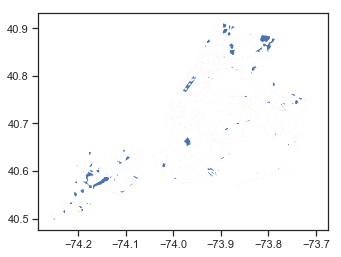

In [214]:
ax = parks.plot(alpha=1)

Let's plot it as UTM instead of WGS84.

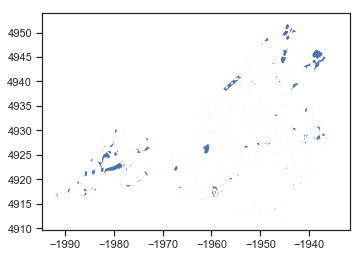

In [209]:
original = dict(ellps='WGS84', datum='WGS84', proj='longlat')

parks.crs = original

target = dict(ellps='WGS84', datum='WGS84', proj='utm', zone=23, units='km', no_defs=True)

ax = parks.to_crs(crs=target).plot(alpha=1)

Resizing the plot

C:\Users\Violet\Anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning:

'axes' is deprecated, please use 'ax' instead (for consistency with pandas)



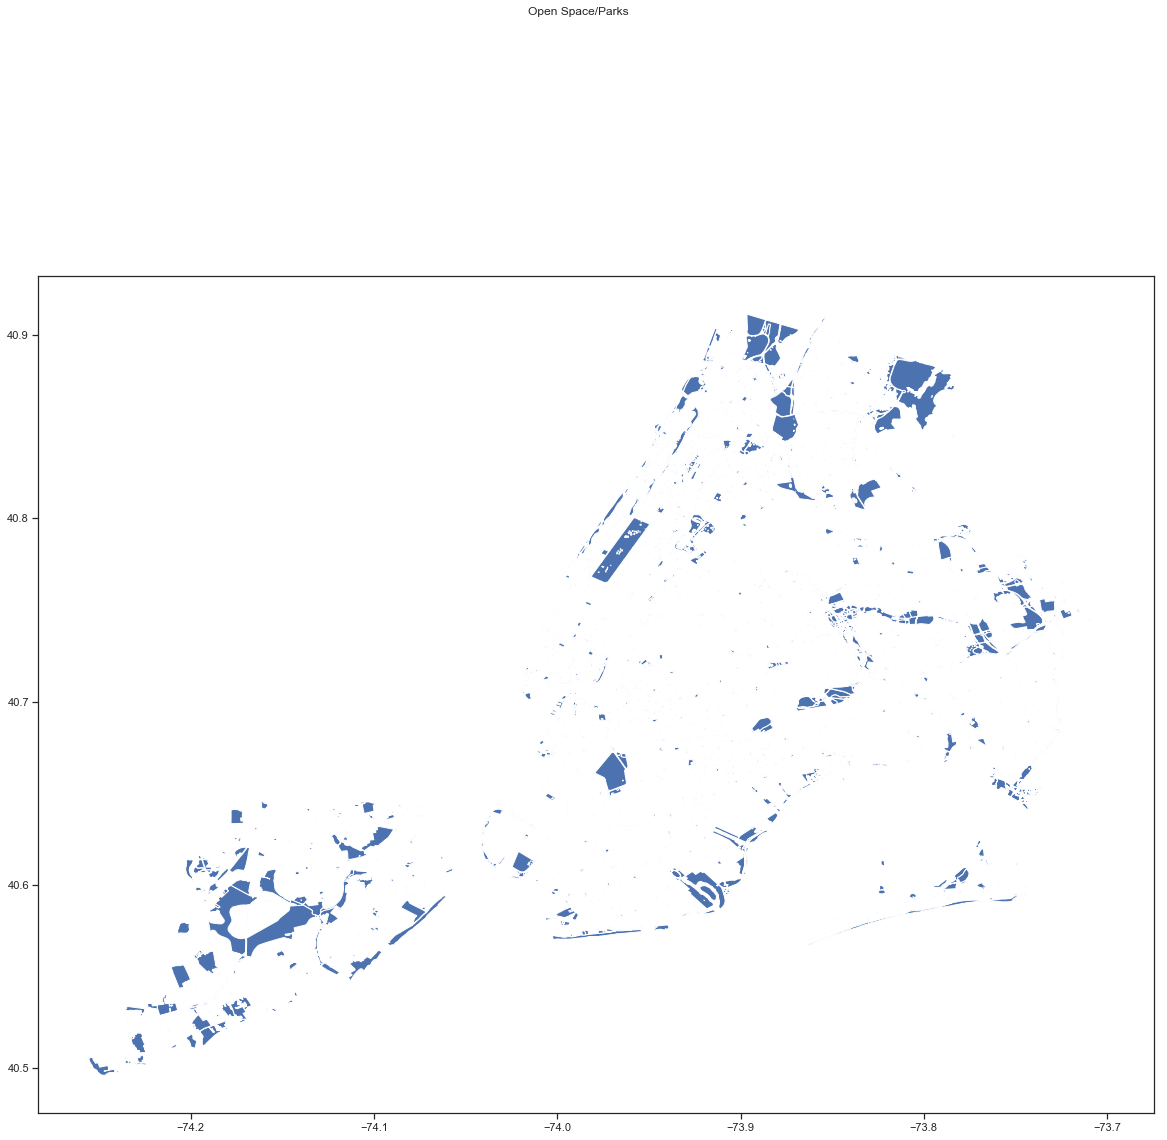

In [210]:
f, ax = plt.subplots(1, figsize=(20, 20))
ax = parks.plot(axes=ax)
f.suptitle('Open Space/Parks')
plt.show()

After visualizing the geospatial data of Open Space/Parks we can observe that most parks are located in Staten Island,Brooklyn,Queens and Upper Manhattan. It would be interesting once we look into the condominium data to see how are prices affected from parks location. 

In [256]:
gr_df = pd.read_csv('C:\\Users\\Violet\\Desktop\\Data608\\green.csv')
gr_df.head()

   


,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA
0,NaN,M,M03,2.0,11 BC Serenity Garden,626 East 11th Street,0.054,DPR,East Village,Avenues B & C,40.727124,-73.978677,10009,28.0,1000000,1003930020,Lower East Side ...
1,NaN,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M382,M,M11,9.0,110th Street Block Association,1651 Madison Avenue,0.043,DPR,East Harlem,Active,40.796295,-73.947533,10029,17402.0,1000000,1016160023,East Harlem South ...
3,M331,M,M11,8.0,117th Street Community Garden,172 E 117th Street,0.080,DPR,East Harlem,Active,40.798976,-73.940376,10035,182.0,1089914,1016440046,East Harlem North ...
4,NaN,M,M03,2.0,11th Street Community Garden,422 East 11th Street,0.054,TPL,East Village,1st Avenue & Avenue A,40.729079,-73.983327,10009,34.0,1000000,1004380019,East Village ...


I'm going to remove all the Nan's 

In [221]:
gr_df = gr_df.dropna()
gr_df.describe()

,Council District,Size,Latitude,Longitude,Census Tract
count,142.000000,142.000000,142.000000,142.000000,142.000000
mean,22.056338,0.152718,40.728475,-73.933979,2301.971831
std,15.799621,0.141316,0.061024,0.040317,6040.007031
min,0.000000,0.012000,40.576242,-74.006259,4.000000
25%,8.000000,0.058250,40.674602,-73.975735,189.000000
50%,17.500000,0.112000,40.720821,-73.939984,401.000000
75%,37.000000,0.182500,40.797699,-73.899603,1165.500000
max,47.000000,1.090000,40.848425,-73.791536,44301.000000


In [227]:
con_df = pd.read_csv('C:\\Users\\Violet\\Desktop\\Data608\\condo.csv')
con_df.head()

,MANHATTAN CONDOMINIUM PROPERTY Boro-Block-Lot,MANHATTAN CONDOMINIUM PROPERTY Condo Section,MANHATTAN CONDOMINIUM PROPERTY Address,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,...,COMPARABLE RENTAL 2 Neighborhood,COMPARABLE RENTAL 2 Building Classification,COMPARABLE RENTAL 2 Total Units,COMPARABLE RENTAL 2 Year Built,COMPARABLE RENTAL 2 Gross SqFt,COMPARABLE RENTAL 2 Est. Gross Income,COMPARABLE RENTAL 2 Gross Income per SqFt,COMPARABLE RENTAL 2 Full Market Value,COMPARABLE RENTAL 2 Market Value per SqFt,COMPARABLE RENTAL 2 Dist. from Coop in miles
0,1-00007-7501,735-R1,1 COENTIES SLIP,1,10004.0,40.703627,-74.010607,1.0,1.0,9.0,...,FINANCIAL,D8-ELEVATOR,61.0,1929.0,57941.0,2260000.0,39.0,11100000.0,192.0,0.40
1,1-00008-7501,1822-R1,39 WHITEHALL STREET,1,10004.0,40.703037,-74.012969,1.0,1.0,9.0,...,CIVIC CENTER,D6-ELEVATOR,151.0,1999.0,139697.0,7168000.0,51.0,35200000.0,252.0,1.05
2,1-00015-7502,1557-R1,20 WEST STREET,1,10004.0,40.706358,-74.016151,1.0,1.0,13.0,...,FINANCIAL,D5-ELEVATOR,482.0,1929.0,390531.0,17218000.0,44.1,84500000.0,216.0,0.40
3,1-00016-7501,308-R1,377 RECTOR PLACE,1,10280.0,40.709506,-74.018002,1.0,1.0,31704.0,...,TRIBECA,D8-ELEVATOR,218.0,1998.0,239185.0,15723000.0,66.0,77200000.0,323.0,0.00
4,1-00016-7502,313-R1,320 ALBANY STREET,1,10280.0,40.710165,-74.016751,1.0,1.0,31704.0,...,TRIBECA,D8-ELEVATOR,218.0,1998.0,239185.0,15723000.0,66.0,77200000.0,323.0,0.00


In [228]:
#Removing NaN's
con_df = con_df.dropna()
con_df.describe()

,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,MANHATTAN CONDOMINIUM PROPERTY Total Units,...,COMPARABLE RENTAL 1 Market Value per SqFt,COMPARABLE RENTAL 1 Dist. from Coop in miles,COMPARABLE RENTAL 2 Total Units,COMPARABLE RENTAL 2 Year Built,COMPARABLE RENTAL 2 Gross SqFt,COMPARABLE RENTAL 2 Est. Gross Income,COMPARABLE RENTAL 2 Gross Income per SqFt,COMPARABLE RENTAL 2 Full Market Value,COMPARABLE RENTAL 2 Market Value per SqFt,COMPARABLE RENTAL 2 Dist. from Coop in miles
count,1079.0,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1.079000e+03,1079.000000,...,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1.079000e+03,1079.000000,1.079000e+03,1079.000000,1079.000000
mean,1.0,10027.708990,40.756733,-73.980404,5.385542,3.862836,1778.177016,1.050344e+06,1.010089e+09,94.370714,...,177.211001,0.440955,122.456905,1950.214087,1.205264e+05,4.860660e+06,37.861038,2.311813e+07,177.650046,0.462484
std,0.0,37.645877,0.030899,0.020128,3.366265,2.267725,5301.001818,3.066669e+04,5.475895e+06,125.554701,...,58.510899,0.516157,126.895775,36.747945,1.379590e+05,5.818910e+06,10.652920,2.831490e+07,60.815623,0.501278
min,1.0,10000.000000,40.703037,-74.018002,1.000000,1.000000,6.000000,1.000000e+06,1.000078e+09,11.000000,...,21.660000,0.000000,11.000000,1885.000000,6.385000e+03,1.198890e+05,10.430000,4.050000e+05,27.000000,0.000000
25%,1.0,10011.000000,40.732191,-73.996591,3.000000,2.000000,65.000000,1.019058e+06,1.005698e+09,23.000000,...,142.000000,0.150000,39.000000,1920.000000,3.344300e+04,1.057568e+06,31.200000,4.630000e+06,145.000000,0.200000
50%,1.0,10019.000000,40.755042,-73.981588,6.000000,4.000000,122.000000,1.052738e+06,1.010438e+09,48.000000,...,175.000000,0.350000,75.000000,1940.000000,6.753600e+04,2.357500e+06,37.800000,1.110000e+07,176.000000,0.350000
75%,1.0,10026.000000,40.778549,-73.965122,8.000000,5.500000,183.000000,1.080202e+06,1.014098e+09,117.000000,...,219.000000,0.550000,164.000000,1986.000000,1.564650e+05,6.170000e+06,44.250000,2.790000e+07,217.000000,0.600000
max,1.0,10280.000000,40.868948,-73.923221,64.000000,10.000000,31704.000000,1.089507e+06,1.022488e+09,1258.000000,...,365.000000,9.600000,1112.000000,2005.000000,1.588533e+06,3.654334e+07,75.000000,1.570000e+08,365.000000,9.200000


In [229]:
#Renaming the long columns
columns = ['boro_block_lot', 'condo_section','address','borough','postcode','latitude',
 'longitude','community_board','council_district','census_tract','BIN','BBL', 'NTA',
 'neighborhood','building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft','rent_1_boro_block_lot','rent_1_address','rent_1_neighborhood',
 'rent_1_building_classification','rent_1_total_units','rent_1_year_built','rent_1_gross_sqft','rent_1_gross_income',
 'rent_1_gross_income_psqft','rent_1_market_value','rent_1_market_value_psqft','rent_1_dist_from_coop_miles',
 'rent_2_boro_block_lot','rent_2_address','rent_2_neighborhood','rent_2_building_classification','rent_2_total_units',
 'rent_2_year_built','rent_2_gross_sqft','rent_2_gross_income','rent_2_gross_income_psqft','rent_2_market_value',
 'rent_2_market_alue_psqft','rent_2_dist_from_coop_miles']

In [230]:
con_df.columns = columns
print('Total number of comumns: {}'.format(len(con_df.columns)))

Total number of comumns: 46


In [231]:
con_df.columns


Index(['boro_block_lot', 'condo_section', 'address', 'borough', 'postcode',
       'latitude', 'longitude', 'community_board', 'council_district',
       'census_tract', 'BIN', 'BBL', 'NTA', 'neighborhood',
       'building_classification', 'total_units', 'year_built', 'gross_sqft',
       'gross_income', 'gross_income_psqft', 'market_value',
       'market_value_psqft', 'rent_1_boro_block_lot', 'rent_1_address',
       'rent_1_neighborhood', 'rent_1_building_classification',
       'rent_1_total_units', 'rent_1_year_built', 'rent_1_gross_sqft',
       'rent_1_gross_income', 'rent_1_gross_income_psqft',
       'rent_1_market_value', 'rent_1_market_value_psqft',
       'rent_1_dist_from_coop_miles', 'rent_2_boro_block_lot',
       'rent_2_address', 'rent_2_neighborhood',
       'rent_2_building_classification', 'rent_2_total_units',
       'rent_2_year_built', 'rent_2_gross_sqft', 'rent_2_gross_income',
       'rent_2_gross_income_psqft', 'rent_2_market_value',
       'rent_2_market_alu

In [232]:
#Process NTA name (remove white space)
con_df["NTA"] = con_df["NTA"].apply(lambda x: str(x).rstrip())

In [233]:
np.unique(list(con_df["NTA"]))

array(['Battery Park City-Lower Manhattan',
       'Central Harlem North-Polo Grounds', 'Central Harlem South',
       'Chinatown', 'Clinton', 'East Harlem North', 'East Harlem South',
       'East Village', 'Gramercy', 'Hamilton Heights',
       'Hudson Yards-Chelsea-Flatiron-Union Square',
       'Lenox Hill-Roosevelt Island', 'Lincoln Square', 'Lower East Side',
       'Marble Hill-Inwood', 'Midtown-Midtown South',
       'Morningside Heights', 'Murray Hill-Kips Bay',
       'SoHo-TriBeCa-Civic Center-Little Italy',
       'Turtle Bay-East Midtown', 'Upper East Side-Carnegie Hill',
       'Upper West Side', 'Washington Heights North',
       'Washington Heights South', 'West Village', 'Yorkville',
       'park-cemetery-etc-Manhattan'], dtype='<U42')

In [234]:
#basic statistics and data descripition
con_df.describe()

,borough,postcode,latitude,longitude,community_board,council_district,census_tract,BIN,BBL,total_units,...,rent_1_market_value_psqft,rent_1_dist_from_coop_miles,rent_2_total_units,rent_2_year_built,rent_2_gross_sqft,rent_2_gross_income,rent_2_gross_income_psqft,rent_2_market_value,rent_2_market_alue_psqft,rent_2_dist_from_coop_miles
count,1079.0,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1.079000e+03,1079.000000,...,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1.079000e+03,1079.000000,1.079000e+03,1079.000000,1079.000000
mean,1.0,10027.708990,40.756733,-73.980404,5.385542,3.862836,1778.177016,1.050344e+06,1.010089e+09,94.370714,...,177.211001,0.440955,122.456905,1950.214087,1.205264e+05,4.860660e+06,37.861038,2.311813e+07,177.650046,0.462484
std,0.0,37.645877,0.030899,0.020128,3.366265,2.267725,5301.001818,3.066669e+04,5.475895e+06,125.554701,...,58.510899,0.516157,126.895775,36.747945,1.379590e+05,5.818910e+06,10.652920,2.831490e+07,60.815623,0.501278
min,1.0,10000.000000,40.703037,-74.018002,1.000000,1.000000,6.000000,1.000000e+06,1.000078e+09,11.000000,...,21.660000,0.000000,11.000000,1885.000000,6.385000e+03,1.198890e+05,10.430000,4.050000e+05,27.000000,0.000000
25%,1.0,10011.000000,40.732191,-73.996591,3.000000,2.000000,65.000000,1.019058e+06,1.005698e+09,23.000000,...,142.000000,0.150000,39.000000,1920.000000,3.344300e+04,1.057568e+06,31.200000,4.630000e+06,145.000000,0.200000
50%,1.0,10019.000000,40.755042,-73.981588,6.000000,4.000000,122.000000,1.052738e+06,1.010438e+09,48.000000,...,175.000000,0.350000,75.000000,1940.000000,6.753600e+04,2.357500e+06,37.800000,1.110000e+07,176.000000,0.350000
75%,1.0,10026.000000,40.778549,-73.965122,8.000000,5.500000,183.000000,1.080202e+06,1.014098e+09,117.000000,...,219.000000,0.550000,164.000000,1986.000000,1.564650e+05,6.170000e+06,44.250000,2.790000e+07,217.000000,0.600000
max,1.0,10280.000000,40.868948,-73.923221,64.000000,10.000000,31704.000000,1.089507e+06,1.022488e+09,1258.000000,...,365.000000,9.600000,1112.000000,2005.000000,1.588533e+06,3.654334e+07,75.000000,1.570000e+08,365.000000,9.200000


After removing NaN rows from condominium data, there are 1079 rows left. 

### Using Scatterplot to find relationships between the different variables 

C:\Users\Violet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



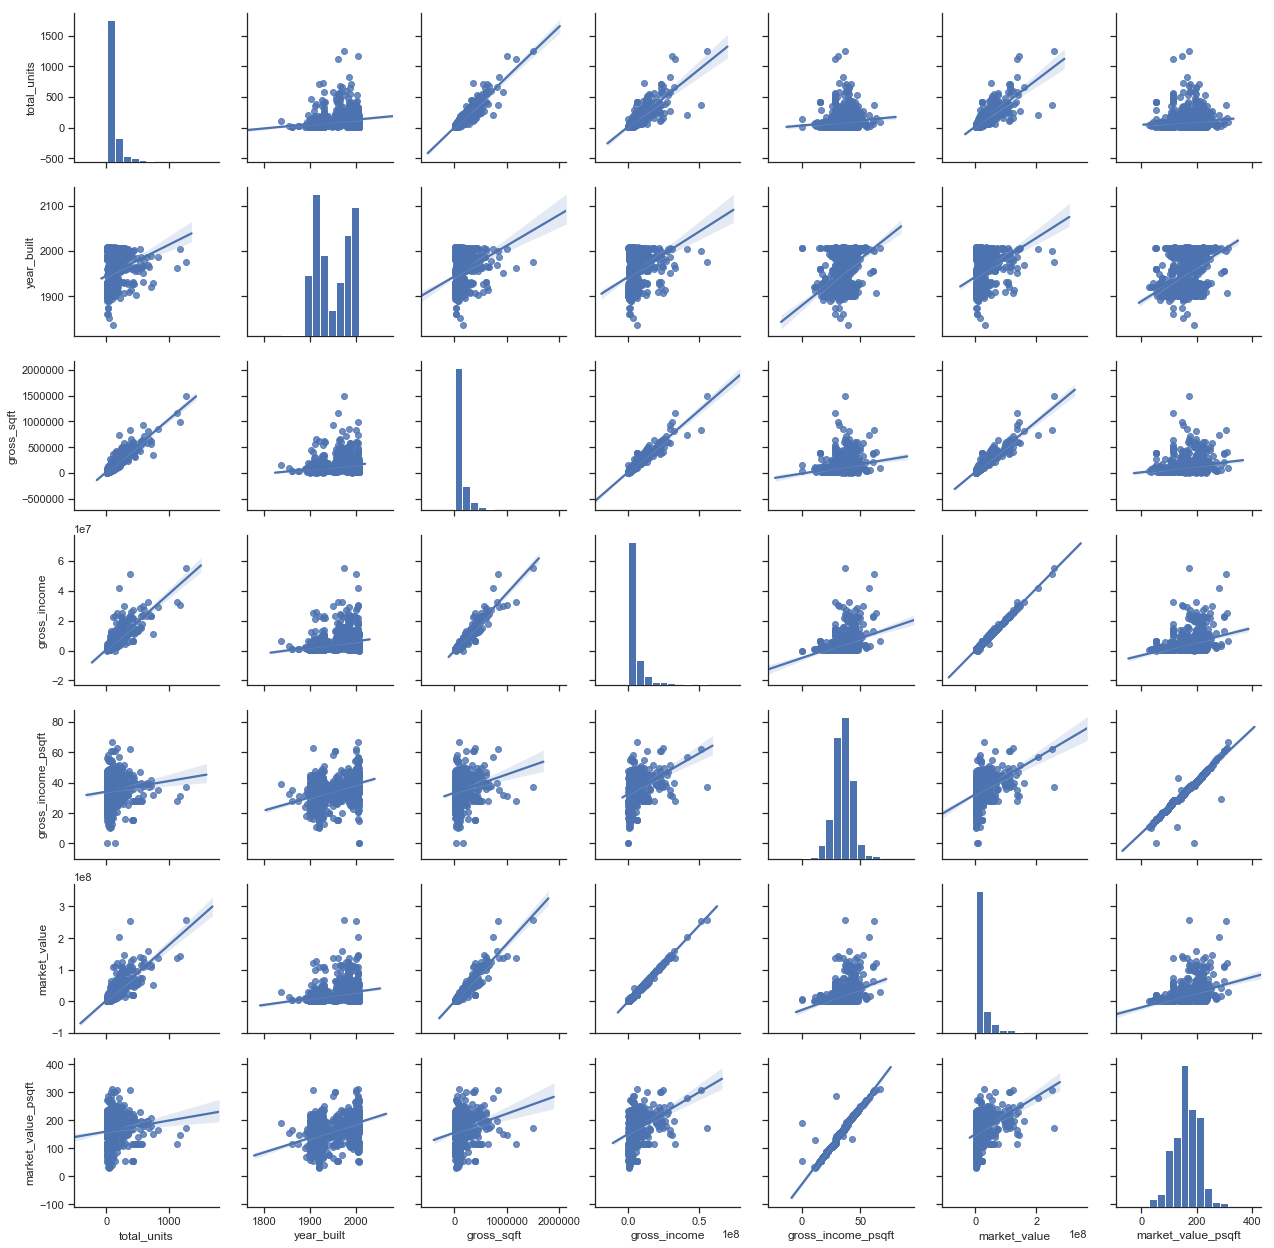

In [235]:
ana_cols = ['building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft']
aa = con_df[ana_cols]

sns.set(style="ticks")
sns.pairplot(aa, kind="reg")
plt.show()

Most of the variables are correlated very well. For instance, gross income vs. market value, gross income from per square feet vs. market value per square fit have excellent and positive linear relationship. While gross sqft and market value, total units and market value, gross sqft and gross income, gross sqft and total units have the semi-perfect positive linear relationship. Some the variable pairs (year built and market value per sqft, year built, gross income, etc.) do not have any significant relationship.

## Mapping

In [245]:
gr_df['Latitude'] = gr_df['Latitude'].astype(float)
gr_df['Longitude'] = gr_df['Longitude'].astype(float)
gr_df = gr_df.dropna(axis=0, subset=['Latitude','Longitude'])

con_df['latitude'] = con_df['latitude'].astype(float)
con_df['longitude'] = con_df['longitude'].astype(float)
con_df = con_df.dropna(axis=0, subset=['latitude','longitude'])

In [255]:
map_1= folium.Map(location=[40.773752, -73.972679], zoom_start = 12) ## ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]

housings_points = int(con_df['longitude'].describe()['count'])
gardens_points = int(gr_df['Longitude'].describe()['count'])

for i in range(housings_points):
    # Other areas   
    latitude = con_df.iloc[i]['latitude']
    longitude = con_df.iloc[i]['longitude']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#FF0000',
                        fill_color='#FF0000').add_to(map_1)
    
    # green areas  
for i in range(gardens_points):
    latitude = gr_df.iloc[i]['Latitude']
    longitude = gr_df.iloc[i]['Longitude']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#008000',
                        fill_color='#008000').add_to(map_1)
map_1

The map shows the high concentaration of condominuims (the red dots) and the few gardens (the green dots) in Manhattan. There are some gardens in the East Village and Uptown but very scarce in midtown and altogether the rest of Manhattan. An interesting further analysis would be to see the highest average price of rent compared to the number of gardens. 

### Neighborhood Tabulation Area (NTA)

I took 4 features from the condominuim data and look at the most expensive neighborhoods in Manhattan according to those 4 features.

In [248]:
nta = con_df.groupby('NTA', as_index = False).agg(np.mean)

nta_list = np.unique(list(nta['NTA']))

features = ['gross_income', 'gross_income_psqft', 'market_value', 'market_value_psqft']
    

def plot_NTA_rank(basis = np.mean):
    
    y_pos = np.arange(len(nta_list))

    fig = plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):

        market_value = list(nta[feature])

        values = sorted(zip(nta_list, market_value), key=lambda x: x[1] * 1)
        sorted_nta_list, sorted_market_value = zip(*values)

        plt.subplot(2,2,i+1)
        plt.barh(y_pos, sorted_market_value)
        plt.yticks(y_pos, sorted_nta_list, fontsize= 10)
        plt.ylabel('NTA')
        plt.title(str(feature.replace('MANHATTAN CONDOMINIUM PROPERTY', '')).title())

    plt.tight_layout()
    plt.show()

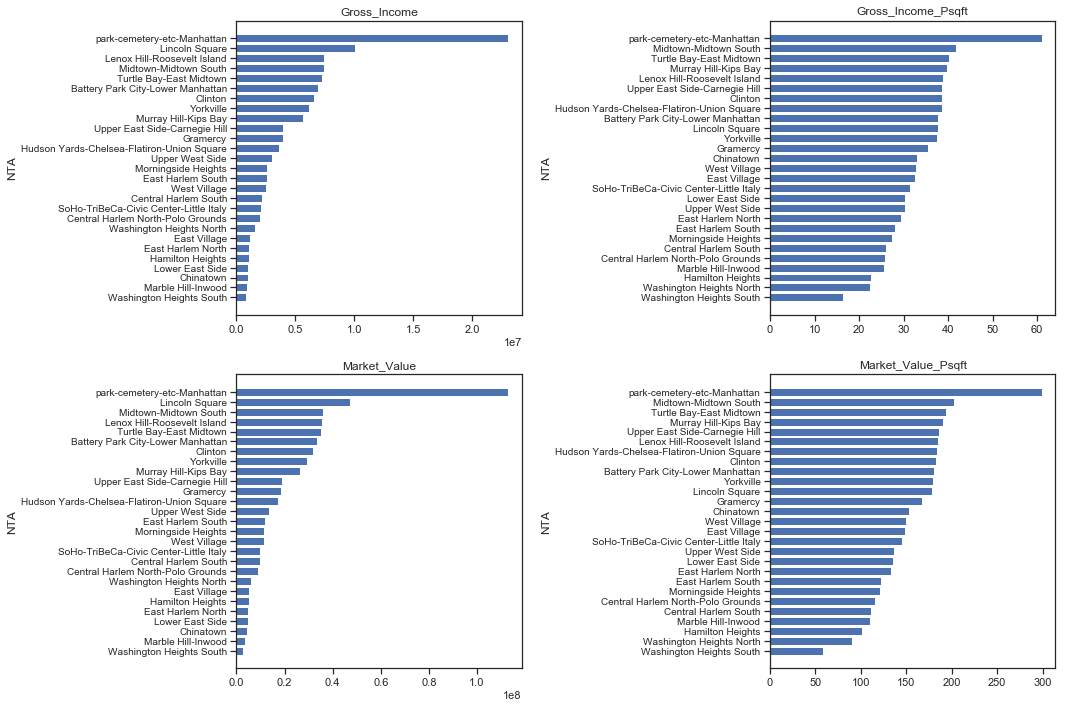

In [249]:
plot_NTA_rank()

As we can see park-cemetery-etc Manhattan is the most expensive NTA in all 4 variables.

### Conclusion

According to the data and the visualizations we can see that there is a discrepency between the amount of parks/gardens and condominium pricing.
In addition the most expensive areas of Manhattan (i.e. Midtown, Times Square, etc) lack open spaces and gardens(except Central Park), whereas areas with more affordable rent are located close to city gardens.